In [1]:
import numpy as np
import pandas as pd

#### 提交一份员工名单，其中员工的工作满意度较低。
#### 提交一份员工名单，其中员工的工作满意度与工作投入程度均较低。
#### 在以下变量中， 通过较低和最高工作满意度对员工进行比较:Age、 Department和DistanceFromHome.

In [16]:
JobSatisfaction_cat = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

In [24]:
data = pd.read_excel('HR-Employee-Attrition.xlsx')
data['JobSatisfaction']= data['JobSatisfaction'].map(JobSatisfaction_cat)
data['JobSatisfaction'].value_counts(normalize = True)

Very High    0.312245
High         0.300680
Low          0.196599
Medium       0.190476
Name: JobSatisfaction, dtype: float64

In [27]:
data['JobSatisfaction'] == 'Low'

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466     True
1467    False
1468    False
1469    False
Name: JobSatisfaction, Length: 1470, dtype: bool

In [30]:
data.loc[data['JobSatisfaction'] == 'Low'].index
#根据索引切片

Int64Index([   6,   15,   21,   24,   26,   29,   38,   39,   41,   52,
            ...
            1403, 1406, 1419, 1436, 1438, 1449, 1460, 1461, 1463, 1466],
           dtype='int64', length=289)

map工作投入度： 

In [31]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [32]:
JobInvolvement_cat = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
data['JobInvolvement'] = data['JobInvolvement'].map(JobInvolvement_cat)
data['JobInvolvement'].tail()

1465    Very High
1466       Medium
1467    Very High
1468       Medium
1469    Very High
Name: JobInvolvement, dtype: object

In [35]:
data.loc[(data['JobSatisfaction'] == 'Low')&(data['JobInvolvement'] == 'Low')].index

Int64Index([26, 171, 336, 458, 734, 748, 882, 1034, 1048, 1090, 1142, 1151,
            1353, 1389],
           dtype='int64')

#### 在以下变量中， 通过较低和最高工作满意度对员工进行比较:Age、 Department和DistanceFromHome.

In [42]:
#创建新的df
subset_of_interest = data.loc[(data['JobSatisfaction'] == 'Low')|(data['JobSatisfaction'] == 'Very High')]
subset_of_interest.shape
subset_of_interest['JobSatisfaction'].value_counts()

Very High    459
Low          289
Name: JobSatisfaction, dtype: int64

In [45]:
grouped = subset_of_interest.groupby('JobSatisfaction')
grouped.groups

{'Low': Int64Index([   6,   15,   21,   24,   26,   29,   38,   39,   41,   52,
             ...
             1403, 1406, 1419, 1436, 1438, 1449, 1460, 1461, 1463, 1466],
            dtype='int64', length=289),
 'Very High': Int64Index([   0,    5,   13,   17,   18,   19,   23,   28,   30,   31,
             ...
             1437, 1439, 1442, 1447, 1450, 1451, 1453, 1458, 1462, 1465],
            dtype='int64', length=459)}

#### 如果希望得到与每个分组所关联的数据，则使用get_group()方法：

In [46]:
grouped.get_group('Low').head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
15,29,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,20,...,3,80,1,10,1,3,10,9,8,8
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0,8,2,3,4,2,1,3
26,32,Yes,Travel_Frequently,1125,Research & Development,16,1,Life Sciences,1,33,...,2,80,0,10,5,3,10,2,6,7


In [59]:
grouped['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
JobSatisfaction,,,,,,,,
Low,289.0,36.916955,9.245496,19.0,30.0,36.0,42.0,60.0
Very High,459.0,36.795207,9.125609,18.0,30.0,35.0,43.0,60.0


In [48]:
grouped['Age'].describe().unstack() #得到一个df

       JobSatisfaction
count  Low                289.000000
       Very High          459.000000
mean   Low                 36.916955
       Very High           36.795207
std    Low                  9.245496
       Very High            9.125609
min    Low                 19.000000
       Very High           18.000000
25%    Low                 30.000000
       Very High           30.000000
50%    Low                 36.000000
       Very High           35.000000
75%    Low                 42.000000
       Very High           43.000000
max    Low                 60.000000
       Very High           60.000000
dtype: float64

关于pandas.unstack:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html

In [54]:
#department
grouped['Department'].value_counts().unstack()

Department,Human Resources,Research & Development,Sales
JobSatisfaction,,,
Low,11,192,86
Very High,17,295,147


In [55]:
grouped['Department'].value_counts(normalize = True).unstack()

Department,Human Resources,Research & Development,Sales
JobSatisfaction,,,
Low,0.038062,0.664360,0.297578
Very High,0.037037,0.642702,0.320261


In [62]:
#DistanceFromHome
grouped['DistanceFromHome'].describe().unstack()

       JobSatisfaction
count  Low                289.000000
       Very High          459.000000
mean   Low                  9.190311
       Very High            9.030501
std    Low                  8.045127
       Very High            8.257004
min    Low                  1.000000
       Very High            1.000000
25%    Low                  2.000000
       Very High            2.000000
50%    Low                  7.000000
       Very High            7.000000
75%    Low                 14.000000
       Very High           14.000000
max    Low                 29.000000
       Very High           29.000000
dtype: float64

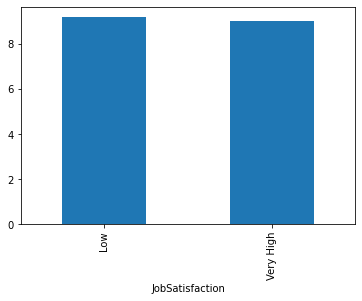

In [63]:
#平均值画图
grouped['DistanceFromHome'].describe().unstack()['mean'].plot(kind = 'bar')